In [3]:
using ControlSystems

Loading default parameters. This is a open-loop test.

In [4]:
Vin = 5;
D0 = 1 / 2;
L = 150e-6;
C = 1e-6;
R = 100;
RL = 0.9;
RC = 0.4;

### State space averaging and linearization

Matrix A

In [5]:
A11 = -1 / L * (RL + ((1 - D0) * R * RC) / (R + RC));
A12 = -(R * (1 - D0)) / (L * (R + RC));
A21 = R * (1 - D0) / (C * (R + RC));
A22 = -1 / (C * (R + RC));

A = [
    A11 A12;
    A21 A22
]

2×2 Matrix{Float64}:
  -7328.02  -3320.05
 498008.0   -9960.16

Matrix B

In [6]:
B11 = 1 / L;
B12 = (Vin * R / L) * (RC + R * (1 - D0)) / ((RL * (R + RC) + R * RC + R^2 * (1 - D0)) * (1 - D0));
B21 = 0;
B22 = (-Vin * R / C) * (1) / (RL * (R + RC) + R * RC + R^2 * (1 - D0));

B = [
    B11 B12;
    B21 B22
]

2×2 Matrix{Float64}:
 6666.67   65492.5
    0.0   -97459.0

Matrix C

In [7]:
C11 = R * RC * (1 - D0) / (R + RC);
C12 = R / (R + RC);

C = [C11 C12]

1×2 Matrix{Float64}:
 0.199203  0.996016

Matrix D

In [8]:
D11 = 0;
D12 = (Vin * R * RC) / ((RL * (R + RC) + R * RC + R^2 * (1 - D0)) * (1 - D0));

D = [D11 D12]

1×2 Matrix{Float64}:
 0.0  0.0779672

Building the system.

In [9]:
Ts = 20e-6
sys = ss(A, B, C, D)

StateSpace{Continuous, Float64}
A = 
  -7328.021248339974  -3320.0531208499337
 498007.96812749      -9960.1593625498
B = 
 6666.666666666667   65492.48005987884
    0.0             -97459.04770815304
C = 
 0.199203187250996  0.99601593625498
D = 
 0.0  0.07796723816652243

Continuous-time state-space model

System's transfer function. Reminder - inputs are $v_{in}$ and $d$, and output is $v_{out}$.

In [10]:
G = tf(sys)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
Input 1 to output 1
    1328.0212483399737s + 3.3200531208499336e9
---------------------------------------------------
1.0s^2 + 17288.180610889773s + 1.7264011682354248e9

Input 2 to output 1
0.07796723816652243s^2 - 82676.54218549954s + 3.2103499046384254e10
-------------------------------------------------------------------
        1.0s^2 + 17288.180610889773s + 1.7264011682354248e9

Continuous-time transfer function model

We'll define initial conditions of our state variables - needed for simulation.

In [11]:
x0_11 = (Vin * (R + RC)) / ((RL * (R + RC) + R * RC + R^2 * (1 - D0)) * (1 - D0));
x0_12 = (Vin * R * (R + RC)) / (RL * (R + RC) + R * RC + R^2 * (1 - D0));

x0 = [x0_11; x0_12]

2-element Vector{Float64}:
 0.1956977677979713
 9.784888389898565

Also, initial condition of our output is

In [12]:
y0 = C * x0

1-element Vector{Float64}:
 9.784888389898564

Let's test no-variation open loop system. This means that $\delta d = 0$ and $\delta v_{in} = 0$.

In [13]:
t = 0:Ts:0.1

vin = 0 .* t
d = 0 .* t

y, t, x = lsim(sys, [vin d]', t, x0=x0);

We've simulated the system. Let's see the response.

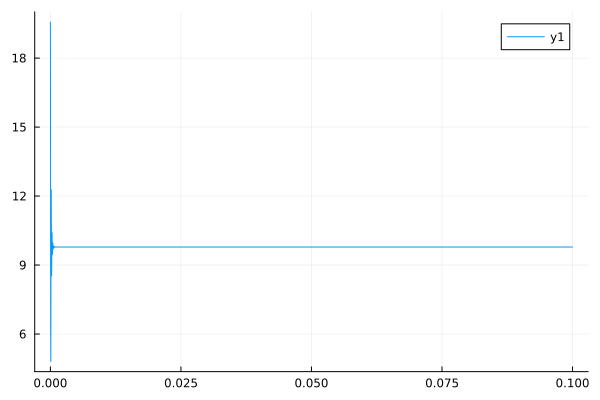

In [14]:
using Plots

y_true = y0 .+ y

plot(t, y_true')

In [15]:
y .+ y0

1×5001 Matrix{Float64}:
 19.5698  16.6135  10.7585  6.07848  …  9.78489  9.78489  9.78489  9.78489